In [1]:
!pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 7.7 MB/s eta 0:00:00


In [2]:
!pip install gymnasium[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 32.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
  Running setup.py install for box2d-py ... done
  DEPRECATION: box2d-py was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https:

In [7]:
import gym
import numpy as np

class Agent(gym.Env):
    def __init__(self, n_states, n_actions):
        self.observation_space = gym.spaces.Discrete(n_states)
        self.states = [n for n in range(self.observation_space.n)]
        self.action_space = gym.spaces.Discrete(n_actions)
        self.actions = [n for n in range(self.action_space.n)]
        self.P = np.random.rand(n_states, n_actions, n_states)
        self.P /= self.P.sum(axis=2, keepdims=True)
        self.rewards = np.random.rand(n_states, n_actions)
        self.value = np.zeros((n_states, 1))
        self.policy = np.random.randint(0, n_states, (n_states, 1))
        self.state = 0
        self.max_iterations = 100
        self.discount_factor = 0.95
        self.threshold = 1e-4

    def step(self, action):
        next_state = np.random.choice(n_states, p=self.P[self.state, action])
        reward = self.rewards[self.state, action]
        self.state = next_state
        return next_state, reward

          # Value iteration
    def value_iteration(self):
        reward_func = self.rewards
        value_func = self.value
        transition_probs = self.P
        
        for i in range(self.max_iterations):
            previous_value_matrix = value_func.copy()
            for state in self.states:
                value_func[state] = np.max(reward_func[state] + self.discount_factor * transition_probs[state] @ previous_value_matrix)
            if np.max(np.abs(previous_value_matrix - value_func)) < self.threshold:
                break

        self.value = value_func

    def policy_iteration(self):
        policy = self.policy
        value_func = self.value
        transition_probs = self.P
        rewards = self.rewards
        
        for i in range(self.max_iterations):
            previous_policy = policy.copy()
            
            # Policy evaluation step
            for j in range(self.max_iterations):
                previous_value_matrix = value_func.copy()
                for state in self.states:
                    action = policy[state]
                    value_func[state] = rewards[state, action] + self.discount_factor * np.sum(transition_probs[state, action, :] * value_func.flatten())
                if np.max(np.abs(previous_value_matrix - value_func)) < self.threshold:
                    break
            
            # Policy improvement step
            for state in self.states:
                action_values = rewards[state, :] + self.discount_factor * np.sum(transition_probs[state, :, :] * value_func.flatten(), axis=1)
                policy[state] = np.argmax(action_values)
            
            if (previous_policy == policy).all():
                break
        
        self.value = value_func
        self.policy = policy

    def reset(self):
        self.state = 0
        return self.state

# Instantiate the environment
n_states = int(input("Enter the number of states"))
n_actions = int(input("Enter the number of actions"))

env = Agent(n_states, n_actions)

Enter the number of states10
Enter the number of actions10


In [8]:
print(f"observation space: {env.observation_space.n}, states created from observation space: {env.states}")
print(f"action space: {env.action_space.n}, states created from observation space: {env.actions}")
print(f"value of each states:\n {env.value}")
print(f"Agent's policy:\n {env.policy}")

observation space: 10, states created from observation space: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
action space: 10, states created from observation space: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
value of each states:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Agent's policy:
 [[7]
 [1]
 [7]
 [3]
 [8]
 [9]
 [8]
 [6]
 [1]
 [1]]


In [9]:
env.value_iteration()
env.policy_iteration()

In [10]:
print(f"observation space: {env.observation_space.n}, states created from observation space: {env.states}")
print(f"action space: {env.action_space.n}, states created from observation space: {env.actions}")
print(f"value of each states:\n {env.value}")
print(f"Agent's policy:\n {env.policy}")

observation space: 10, states created from observation space: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
action space: 10, states created from observation space: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
value of each states:
 [[17.73289681]
 [17.67146856]
 [17.67463072]
 [17.69715357]
 [17.71168772]
 [17.71399782]
 [17.61402215]
 [17.72848542]
 [17.55596631]
 [17.616591  ]]
Agent's policy:
 [[7]
 [6]
 [3]
 [7]
 [3]
 [1]
 [9]
 [2]
 [0]
 [5]]


In [18]:
# Train an agent
state = env.reset()
rewards_list = []
transitions = int(input("Enter the number of transitions:  "))
for i in range(transitions):
    action = env.action_space.sample() # sample a random action
    next_state, reward= env.step(action)
    print(reward)
    rewards_list.append(reward)
    print(f"state: {state}, action: {action}, next_state: {next_state}, reward: {reward}")
    state = next_state

Enter the number of transitions:  10
0.85778005831201
state: 0, action: 8, next_state: 8, reward: 0.85778005831201
0.7157191404591408
state: 8, action: 2, next_state: 8, reward: 0.7157191404591408
0.7025647513283715
state: 8, action: 6, next_state: 3, reward: 0.7025647513283715
0.4029345026658129
state: 3, action: 1, next_state: 5, reward: 0.4029345026658129
0.2027957561308481
state: 5, action: 2, next_state: 3, reward: 0.2027957561308481
0.4029345026658129
state: 3, action: 1, next_state: 8, reward: 0.4029345026658129
0.45391330582478895
state: 8, action: 5, next_state: 1, reward: 0.45391330582478895
0.41257945599055923
state: 1, action: 3, next_state: 7, reward: 0.41257945599055923
0.7300594128731823
state: 7, action: 0, next_state: 0, reward: 0.7300594128731823
0.85778005831201
state: 0, action: 8, next_state: 8, reward: 0.85778005831201


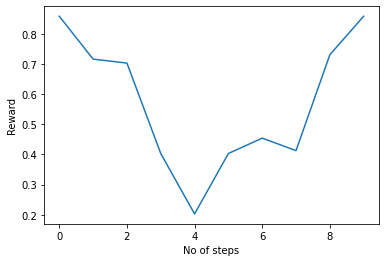

In [21]:
import matplotlib.pyplot as plt
plt.plot([n for n in range (transitions)], rewards_list)
plt.xlabel("No of steps")
plt.ylabel("Reward")
plt.show()

In [25]:
# Train an agent
state = env.reset()
rewards_list = []
transitions = int(input("Enter the number of transitions:  "))
for i in range(transitions):
    action = int(env.policy[state]) # action based on policy
    next_state, reward = env.step(action)
    print(reward)
    rewards_list.append(reward)
    print(f"state: {state}, action: {action}, next_state: {next_state}, reward: {reward}")
    env.state = next_state

Enter the number of transitions:  10
0.9541863448297221
state: 0, action: 7, next_state: 4, reward: 0.9541863448297221
0.5531337748324583
state: 0, action: 7, next_state: 5, reward: 0.5531337748324583
0.09533654321179619
state: 0, action: 7, next_state: 9, reward: 0.09533654321179619
0.5850128680222514
state: 0, action: 7, next_state: 1, reward: 0.5850128680222514
0.6289183867225578
state: 0, action: 7, next_state: 9, reward: 0.6289183867225578
0.5850128680222514
state: 0, action: 7, next_state: 7, reward: 0.5850128680222514
0.875437881342906
state: 0, action: 7, next_state: 4, reward: 0.875437881342906
0.5531337748324583
state: 0, action: 7, next_state: 1, reward: 0.5531337748324583
0.6289183867225578
state: 0, action: 7, next_state: 3, reward: 0.6289183867225578
0.9067336860204553
state: 0, action: 7, next_state: 4, reward: 0.9067336860204553


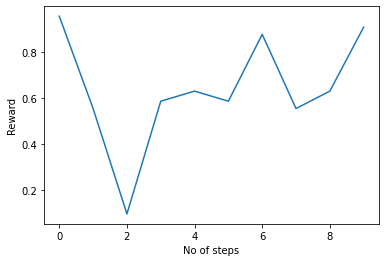

In [26]:
import matplotlib.pyplot as plt
plt.plot([n for n in range (transitions)], rewards_list)
plt.xlabel("No of steps")
plt.ylabel("Reward")
plt.show()